<a href="https://colab.research.google.com/github/Bloch-AI/BlochAI-LargeLanguageModel/blob/master/A1PimaSVM(Kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SVM Model to predict diabetes using the Pima Indians Diabetes dataset**
**1. Data Loading and Exploration:**

The code begins by importing necessary libraries and loading the Pima Indians Diabetes dataset. It then takes an initial look at the data, identifying potential missing values and examining the relationships between different features. This step ensures the data is ready for further analysis.

**2. Data Cleaning and Preparation:**

The code carefully cleans and prepares the data for model building. This includes handling missing values, removing outliers, and transforming certain features into a format suitable for machine learning algorithms. These preprocessing steps are crucial for improving model accuracy and performance.

**3. Model Building and Evaluation:**

The code then focuses on building and evaluating a machine learning model for diabetes prediction. It uses a Support Vector Machine algorithm and fine-tunes its parameters using a technique called Grid Search. The model's performance is then assessed using various metrics and visualizations, such as classification reports and ROC curves. This step ensures that the chosen model is suitable for the task at hand.

In [1]:
from google.colab import files
files.upload()   # This will open a file picker dialog

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


{'pima-indians-diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [4]:
diabetes_df = pd.read_csv('pima-indians-diabetes.csv')
print(diabetes_df)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [5]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Data Preparation**

In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In summary, the code iterates through the columns 'BMI', 'Insulin', 'SkinThickness', 'BloodPressure', and 'Glucose'. For each column, it calculates the percentage of rows where the value is 0 and prints this percentage to the console.

This step is crucial in data analysis as it helps to identify potential data quality issues or missing values represented by zeros.

In [7]:
print("Number of Zeros for BMI: ","%", round(len(diabetes_df[diabetes_df["BMI"]==0])/len(diabetes_df)*100,3))
print("Number of Zeros for Insulin: ","%", round(len(diabetes_df[diabetes_df["Insulin"]==0])/len(diabetes_df)*100,3))
print("Number of Zeros for SkinThickness: ","%", round(len(diabetes_df[diabetes_df["SkinThickness"]==0])/len(diabetes_df)*100,3))
print("Number of Zeros for BloodPressure: ","%", round(len(diabetes_df[diabetes_df["BloodPressure"]==0])/len(diabetes_df)*100,3))
print("Number of Zeros for Glucose: ","%", round(len(diabetes_df[diabetes_df["Glucose"]==0])/len(diabetes_df)*100,3))

Number of Zeros for BMI:  % 1.432
Number of Zeros for Insulin:  % 48.698
Number of Zeros for SkinThickness:  % 29.557
Number of Zeros for BloodPressure:  % 4.557
Number of Zeros for Glucose:  % 0.651


This code snippet creates a copy of the original DataFrame, replaces 0 values in specific columns with NaN to represent missing data, and then calculates the number of missing values in each column. This is a common data cleaning step in data analysis to ensure that missing values are handled correctly before proceeding with further analysis or model building.

In [8]:
diabetes_df2=diabetes_df.copy()
diabetes_df2[["Glucose","BloodPressure","BMI","Insulin","SkinThickness"]] = diabetes_df2[["Glucose","BloodPressure",
                                                                                          "BMI","Insulin","SkinThickness"]].replace(0,np.NaN)
diabetes_df2.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In simpler terms, this line removes any rows from diabetes_df2 that have missing data in the "Glucose", "BloodPressure", or "BMI" columns. It modifies the DataFrame directly.
The next line calculates and displays the number of missing values in each column of your updated diabetes_df2 DataFrame. This helps you verify if the dropna() operation worked as intended and how many missing values remain in other columns.

In [9]:
diabetes_df2.dropna(subset=["Glucose","BloodPressure","BMI"],inplace=True)
diabetes_df2.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,192
Insulin,332
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


The first line removes rows with missing values in critical columns ("Glucose", "BloodPressure", "BMI"). The second line is then used to verify the effect of the first line. By checking isnull().sum() after dropping rows, you can confirm that there are no more missing values in those specific columns and see how many missing values might remain in other columns of the DataFrame. This is a standard data cleaning procedure to ensure data quality before further analysis.

In [10]:
diabetes_df2.dropna(subset=["Glucose","BloodPressure","BMI"],inplace=True)
diabetes_df2.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,192
Insulin,332
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**Exploratory Data Analysis**

This line of code creates a visual representation of the distribution of each numerical feature in your dataset. It's a way to quickly see the range of values, the frequency of those values, and the overall shape of the data for each column. It's a key step in exploratory data analysis to understand your data better. Each numerical column (like "Glucose", "BloodPressure", etc.) will get its own histogram plot within the overall figure. The histograms will have blue bars and will be displayed on a figure that is 14 inches wide and 8 inches tall.

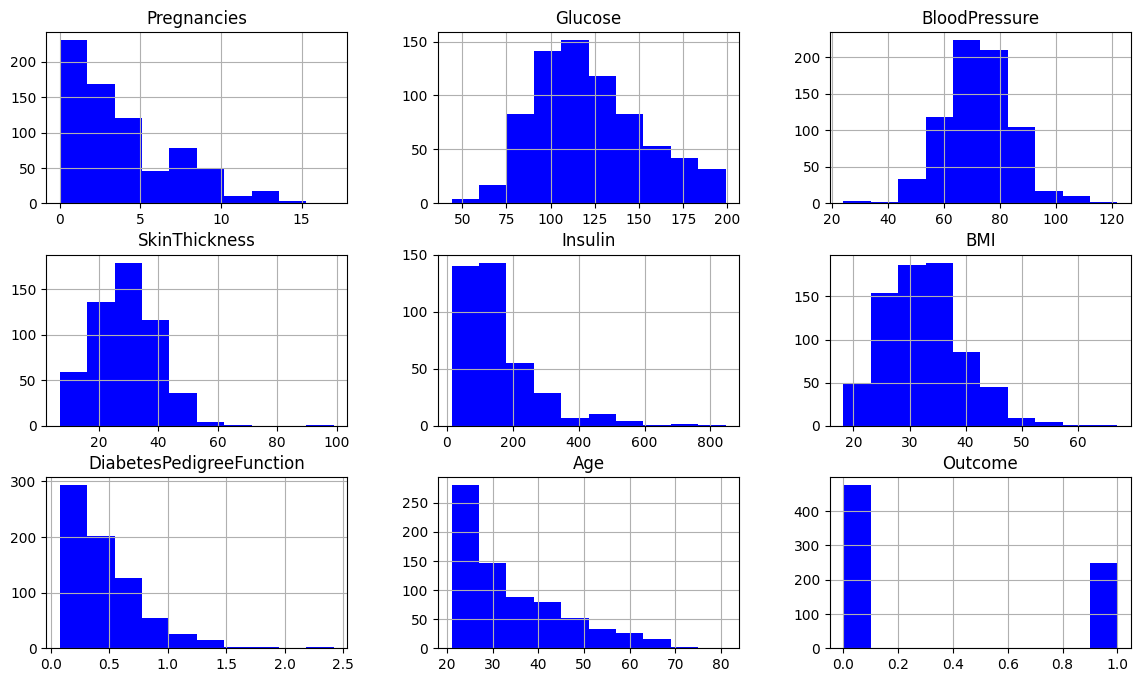

In [11]:
diabetes_df2.hist(color='blue',figsize = (14,8));

This code creates a bar chart that shows how many people in the dataset have diabetes and how many people do not have diabetes. It's a simple way to visualize the distribution of the target variable ('Outcome') in your dataset.

<Axes: xlabel='Outcome', ylabel='count'>

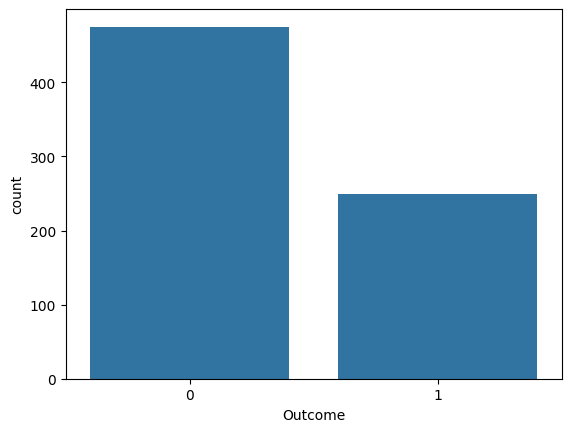

In [12]:
sns.countplot(x="Outcome",data=diabetes_df2)


In essence, this code generates a visual summary of the distribution of key features in the diabetes dataset, allowing for quick identification of potential outliers and the overall data spread. Each box in the plot represents the interquartile range (IQR) of the data, with the whiskers extending to show the range of data within 1.5 times the IQR. Any points outside the whiskers are considered potential outliers.

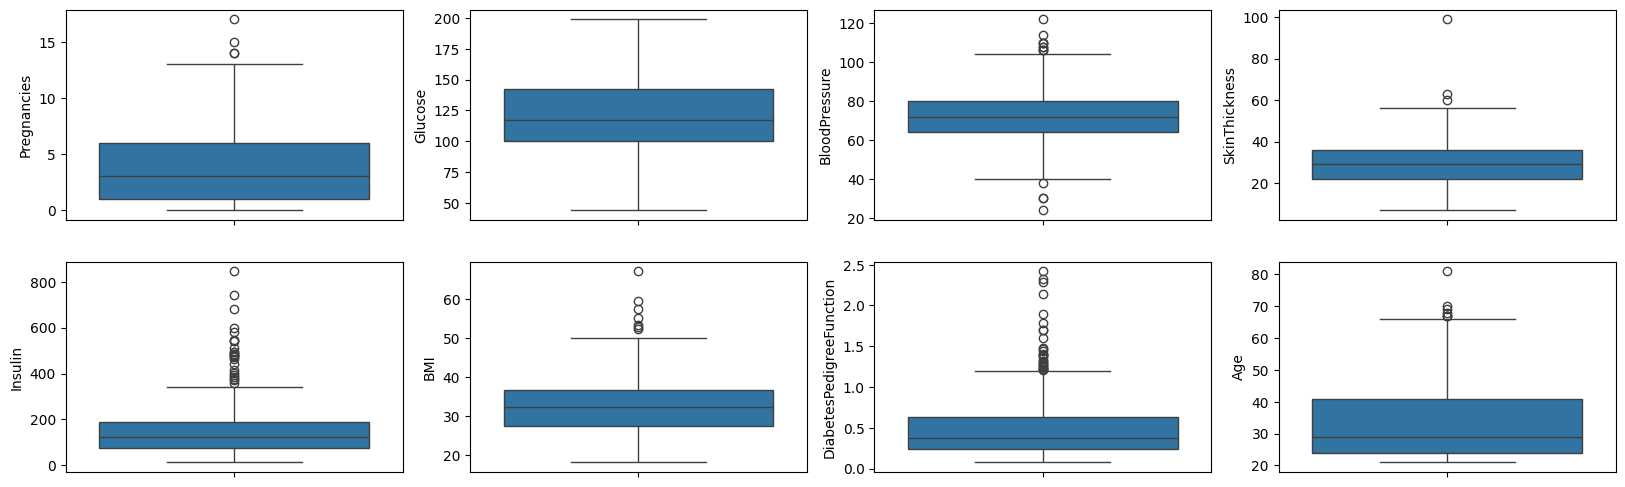

In [13]:
fig, axes = plt.subplots(nrows = 2,ncols = 4,figsize = (20,6))
ax = sns.boxplot(y="Pregnancies",data=diabetes_df2,ax=axes[0,0])
ax = sns.boxplot(y="Glucose",data=diabetes_df2,ax=axes[0,1])
ax = sns.boxplot(y="BloodPressure",data=diabetes_df2,ax=axes[0,2])
ax = sns.boxplot(y="SkinThickness",data=diabetes_df2,ax=axes[0,3])
ax = sns.boxplot(y="Insulin",data=diabetes_df2,ax=axes[1,0])
ax = sns.boxplot(y="BMI",data=diabetes_df2,ax=axes[1,1])
ax = sns.boxplot(y="DiabetesPedigreeFunction",data=diabetes_df2,ax=axes[1,2])
ax = sns.boxplot(y="Age",data=diabetes_df2,ax=axes[1,3])

This code defines a Python function called kdeplot_Diabetes. This function is designed to create a Kernel Density Estimation (KDE) plot to visualize the distribution of a specific column (col) in the diabetes_df2 DataFrame, separated by the 'Outcome' (diabetes or not diabetes).

In essence, this function helps you visually compare the distribution of a specific feature (like 'Glucose', 'BloodPressure', etc.) between individuals with and without diabetes, aiding in understanding how these features might be related to the outcome.

In [16]:
def kdeplot_Diabetes(col,ax=None):

    ax = sns.kdeplot(diabetes_df2[col][(diabetes_df2["Outcome"] == 1) ],color="Red",ax=ax)
    ax = sns.kdeplot(diabetes_df2[col][(diabetes_df2["Outcome"] == 0) ],color="Blue",ax=ax)
    ax.legend(["Diabetes","Not Diabetes"],loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(col)
    ax.set_title("Distribution of "+ col +" by Diabetes")

This code generates 8 KDE plots, arranged in a 2x4 grid, to visualize the distribution of 8 different features ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age') from the diabetes_df2 DataFrame. Each plot compares the distribution of the feature for individuals with diabetes (red line) and without diabetes (blue line).

This visualization helps to understand how each feature is distributed differently between the two groups ('Outcome' = 0 or 1) and can provide insights into which features might be more important in predicting diabetes.

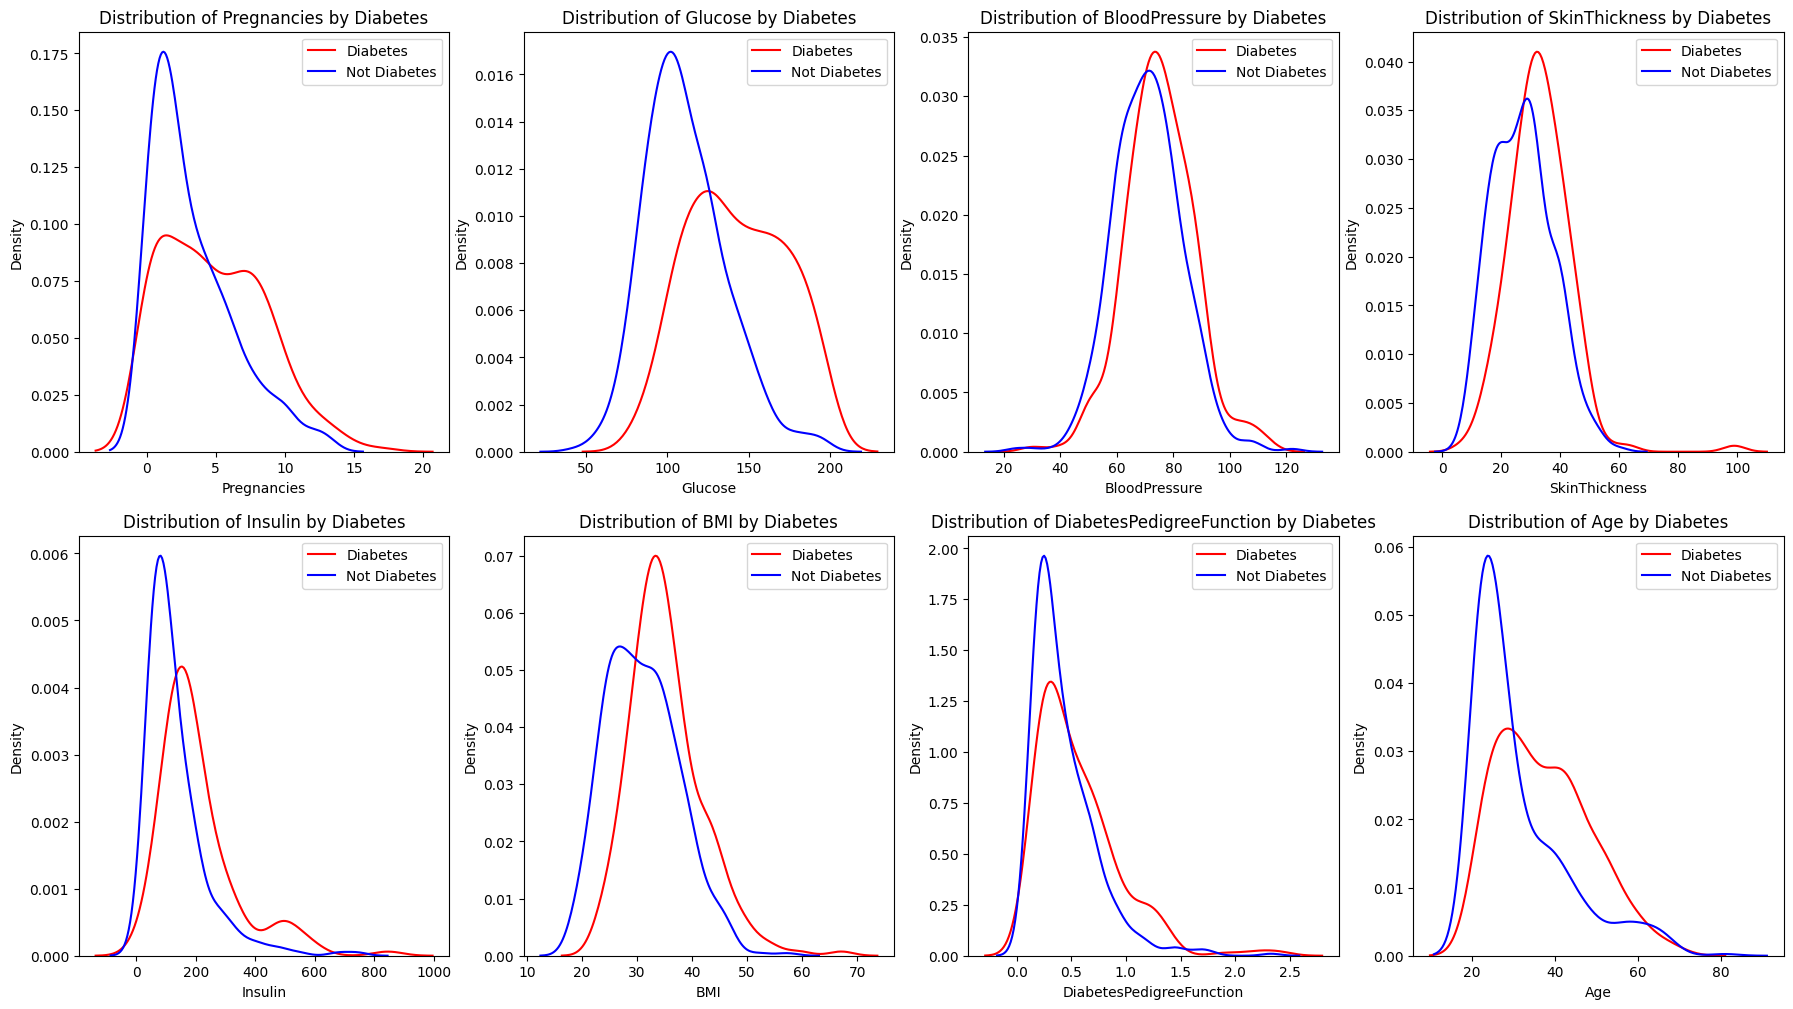

In [17]:
fig, axes = plt.subplots(nrows = 2,ncols = 4,figsize = (22,12))
kdeplot_Diabetes("Pregnancies",ax=axes[0,0])
kdeplot_Diabetes("Glucose",ax=axes[0,1])
kdeplot_Diabetes("BloodPressure",ax=axes[0,2])
kdeplot_Diabetes("SkinThickness",ax=axes[0,3])
kdeplot_Diabetes("Insulin",ax=axes[1,0])
kdeplot_Diabetes("BMI",ax=axes[1,1])
kdeplot_Diabetes("DiabetesPedigreeFunction",ax=axes[1,2])
kdeplot_Diabetes("Age",ax=axes[1,3])

The remove_outliers function helps clean your data by removing data points that are significantly different from the majority of the data within a specific column, making your analysis more robust.

In [18]:
def remove_outliers (data,col):

    outliers_val = data[data[col].notnull()][col].values
    q25, q75 = np.percentile(outliers_val, 25), np.percentile(outliers_val, 75)
    outliers_iqr = q75 - q25

    outliers_cut_off = outliers_iqr * 1.5
    outliers_lower, outliers_upper = q25 - outliers_cut_off, q75 + outliers_cut_off

    outliers = [x for x in outliers_val if x < outliers_lower or x > outliers_upper]

    data_new = data.drop(data[(data[col] > outliers_upper) | (data[col] < outliers_lower)].index)
    return data_new

This line creates a new DataFrame called diabetes_df3 which is an exact copy of diabetes_df2. This is done to avoid modifying the original diabetes_df2 DataFrame directly. This code snippet is focused on cleaning the data by removing outliers from specific columns (Pregnancies, SkinThickness, BloodPressure) to improve the quality and reliability of the data for further analysis and model building.

In [19]:
diabetes_df3=diabetes_df2.copy()
diabetes_df3=remove_outliers(diabetes_df3,"Pregnancies")
diabetes_df3=remove_outliers(diabetes_df3,"SkinThickness")
diabetes_df3=remove_outliers(diabetes_df3,"BloodPressure")
diabetes_df3.shape

(703, 9)

This line is creating a new column in the diabetes_df3 DataFrame called Age_cat. This new column categorizes the ages of individuals into 4 quantiles (or groups) based on the values in the existing "Age" column.

In [20]:
diabetes_df3["Age_cat"]=pd.qcut(diabetes_df3["Age"],4)

In [21]:
diabetes_df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_cat
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,"(40.5, 81.0]"
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,"(29.0, 40.5]"
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,"(29.0, 40.5]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20.999, 24.0]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(29.0, 40.5]"
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(40.5, 81.0]"
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,"(24.0, 29.0]"
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(29.0, 40.5]"
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,"(40.5, 81.0]"


This code creates a new column BMI_cat that categorizes individuals into different BMI groups (underweight, normal, overweight, obese) based on their BMI values, which helps in simplifying the data representation for analysis.

In [22]:
diabetes_df3["BMI_cat"]=1
diabetes_df3.loc[:,'BMI_cat'] = np.where((diabetes_df3["BMI"] <= 18.5),0,
                                         np.where((diabetes_df3["BMI"] <=25)& (diabetes_df3["BMI"]> 18.5),1,
                                                  np.where((diabetes_df3["BMI"] <= 30)& (diabetes_df3["BMI"]> 25),2,
                                                           np.where((diabetes_df3["BMI"] > 30),3,9))))

This line of code permanently removes the "Age" and "BMI" columns from the diabetes_df3 DataFrame. The reason for doing this is because these columns are represented by other, more refined columns like "Age_cat" and "BMI_cat", respectively, within the code as shown in the previous steps and are no longer needed.

In [23]:
diabetes_df3.drop(["Age","BMI"],axis=1,inplace=True)

Machine learning algorithms typically work best with numerical data. Since 'Age_cat' and 'BMI_cat' are categorical, one-hot encoding helps prepare the data for use in the Support Vector Machine model that will be built later in the code.

pd.get_dummies(): This is a function from the Pandas library (pd) used for one-hot encoding.
One-hot encoding: This technique converts categorical variables (like 'Age_cat' and 'BMI_cat', which represent categories or groups) into a numerical format that machine learning models can understand.
diabetes_df3: This is the input DataFrame that contains the categorical variables.
diabetes_df3_d: This is the new DataFrame that will be created after one-hot encoding is applied. It will contain new columns representing each category within the original categorical columns.
In simpler terms: This line takes the DataFrame diabetes_df3 and transforms any categorical columns (like 'Age_cat', 'BMI_cat') into multiple numerical columns, where each new column represents a specific category.

In [24]:
diabetes_df3_d= pd.get_dummies(diabetes_df3)
diabetes_df3_d.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,BMI_cat,"Age_cat_(20.999, 24.0]","Age_cat_(24.0, 29.0]","Age_cat_(29.0, 40.5]","Age_cat_(40.5, 81.0]"
0,6,148.0,72.0,35.0,NaN,0.627,1,3,False,False,False,True
1,1,85.0,66.0,29.0,NaN,0.351,0,2,False,False,True,False
2,8,183.0,64.0,NaN,NaN,0.672,1,1,False,False,True,False
3,1,89.0,66.0,23.0,94.0,0.167,0,2,True,False,False,False
4,0,137.0,40.0,35.0,168.0,2.288,1,3,False,False,True,False


This code is creating a heatmap visualization to show the correlation between different features in the dataset and the target variable, "Outcome" (which represents whether a person has diabetes or not).

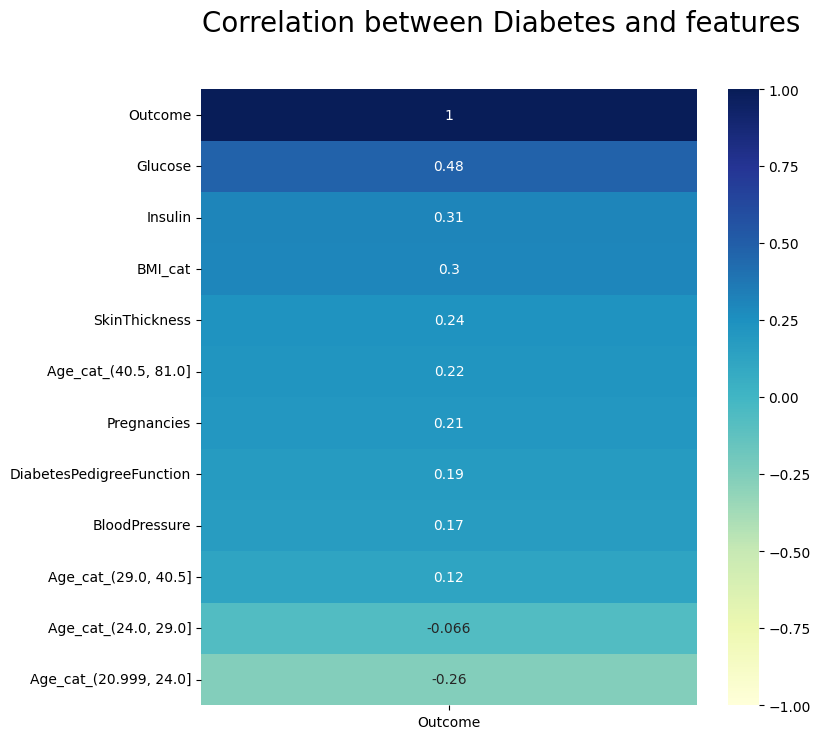

In [25]:
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('Correlation between Diabetes and features',fontsize=20)
ax=sns.heatmap(diabetes_df3_d.corr()[["Outcome"]].sort_values("Outcome"),vmax=1, vmin=-1, cmap="YlGnBu", annot=True, ax=ax);
ax.invert_yaxis()

In [ ]:
diabetes_df3_d.info()

**Support Vector Machine Algorithm**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score,roc_curve

These two lines separate the dataset into features (X) and the target variable (y), which is a crucial step before training a machine learning model. The model will learn patterns from the features (X) to predict the target variable (y).

In [27]:
X=diabetes_df3_d.drop("Outcome",axis=1)
y=diabetes_df3_d["Outcome"]

This line is using the train_test_split function from the sklearn.model_selection module to split the data into training and testing sets. This is a standard practice in machine learning to evaluate the performance of a model on unseen data.

Here's a breakdown of the arguments:

X: This variable represents the features of the dataset. It contains all the columns that will be used to predict the target variable.
y: This variable represents the target variable, which is what the model is trying to predict. In this case, it is the 'Outcome' column, indicating whether a person has diabetes or not.
test_size=0.2: This specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training the model.
random_state=42: This sets a seed for the random number generator, ensuring that the data is split in the same way every time the code is run. This is important for reproducibility.
shuffle=True: This indicates that the data should be shuffled randomly before splitting it into training and testing sets. Shuffling helps to prevent the model from learning any patterns that might be present in the order of the data.
stratify=y: This ensures that the proportion of the target variable (y) in the training and testing sets is similar to the proportion in the original dataset. This is especially important when dealing with imbalanced datasets, where one class might be significantly more prevalent than the other.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True, stratify = y)

this code section builds, optimizes, and evaluates a Linear Support Vector Machine model for diabetes prediction using a pipeline, GridSearchCV for hyperparameter tuning, and a classification report for performance assessment.

In [29]:
linsvc_pipe = Pipeline([
    ("imp", IterativeImputer(estimator= KNeighborsRegressor())),
    ("scaler", StandardScaler()),
    ("linsvc", LinearSVC(random_state=42,class_weight="balanced"))
])

params={
    "linsvc__C":[3,4,5,6],
    "linsvc__loss": ["hinge","squared_hinge"],
    "linsvc__penalty":["l1","l2"]

}

linsvc_grid = GridSearchCV(linsvc_pipe, params, cv=3,n_jobs=-1)
linsvc_grid.fit(X_train, y_train)
print("Best Parameters for Model:  ",linsvc_grid.best_params_)
y_pred=linsvc_grid.predict(X_train)
print("\n")
print(classification_report(y_train, y_pred))

Best Parameters for Model:   {'linsvc__C': 3, 'linsvc__loss': 'squared_hinge', 'linsvc__penalty': 'l1'}


              precision    recall  f1-score   support

           0       0.88      0.77      0.83       373
           1       0.64      0.80      0.71       189

    accuracy                           0.78       562
   macro avg       0.76      0.79      0.77       562
weighted avg       0.80      0.78      0.79       562



This code snippet is focused on evaluating the performance of the trained machine learning model using a Receiver Operating Characteristic (ROC) curve and calculating the Area Under the Curve (AUC) score. These are common techniques used to assess the performance of binary classification models, like the one used here for predicting diabetes.

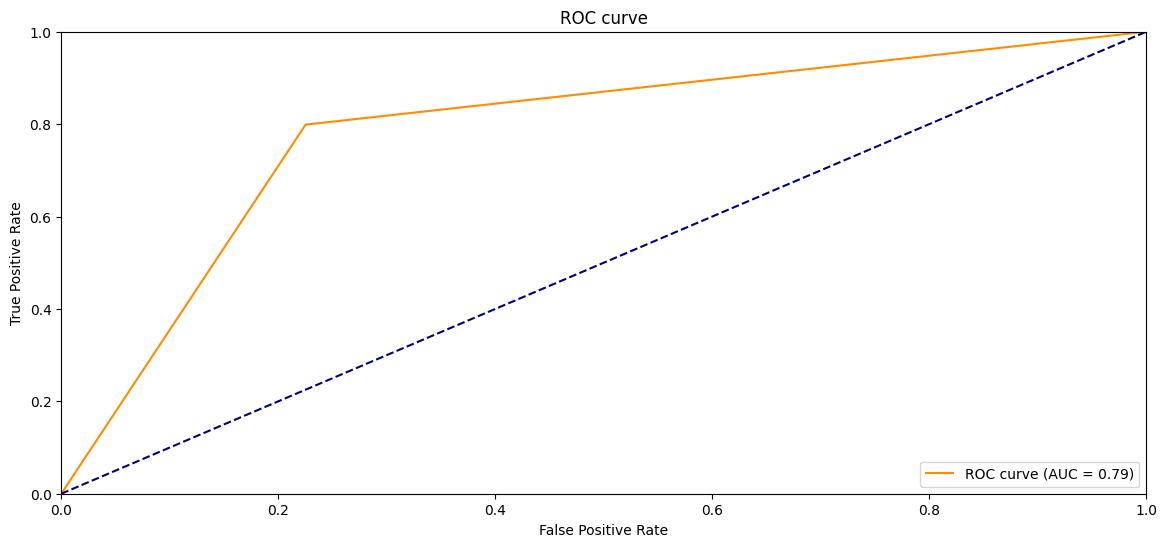

In [30]:
fpr, tpr, thresholds =roc_curve(y_train, y_pred, pos_label=1)
roc_auc=roc_auc_score(y_train, y_pred)
plt.figure( figsize=(14,6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()